<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green">Определение перспективного тарифа для телеком компании</h1>

# Описание проекта

Задача: провести предварительный анализ тарифов на небольшой выборке клиентов пользователей федерального оператора сотовой связи "Мегалайн". 

Заказчик - коммерческий департамент. Цель заказчика - скорректировать рекламный бюджет, определить прибыльность тарифов. 

Входные данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  

Цель исследования - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».
Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
    


### Описание данных
Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План действий

1. Знакомство с данными. Изучение общей информации.
2. Предподготовка данных.
3. Анализ данных.
4. Проверка гипотез.
5. Выводы.

## Знакомство с данными. Изучение общей информации

In [1]:
import matplotlib.pyplot as plt # выгружаем необходимые библиотеки
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from functools import reduce
import seaborn as sb

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #изменение глобальной настройки отображения 

In [3]:
def info_data(data):
    '''Принимает таблицу, возвращает первые 15 строк, общую информацию, наличие пропусков и дубликатов'''
    print(data.head(15))
    print(data.info())
    print(data.isnull().sum())
    print(data.duplicated().sum())

In [4]:
calls = pd.read_csv('/datasets/calls.csv') #таблица со звонками (длительность, дата, id пользователя и звонка)
info_data(calls)


         id   call_date  duration  user_id
0    1000_0  2018-07-25     0.000     1000
1    1000_1  2018-08-17     0.000     1000
2    1000_2  2018-06-11     2.850     1000
3    1000_3  2018-09-21    13.800     1000
4    1000_4  2018-12-15     5.180     1000
5    1000_5  2018-11-02     0.000     1000
6    1000_6  2018-10-18     0.000     1000
7    1000_7  2018-08-22    18.310     1000
8    1000_8  2018-09-15    18.440     1000
9    1000_9  2018-08-15     0.000     1000
10  1000_10  2018-08-22     5.030     1000
11  1000_11  2018-05-28    18.820     1000
12  1000_12  2018-07-05     2.020     1000
13  1000_13  2018-09-29     7.150     1000
14  1000_14  2018-12-11     9.130     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+

In [5]:
internet = pd.read_csv('/datasets/internet.csv') #таблица с данными об интернет сессиях (дата,id, длительность,
#объем трафика)
info_data(internet)

    Unnamed: 0       id  mb_used session_date  user_id
0            0   1000_0  112.950   2018-11-25     1000
1            1   1000_1 1052.810   2018-09-07     1000
2            2   1000_2 1197.260   2018-06-25     1000
3            3   1000_3  550.270   2018-08-22     1000
4            4   1000_4  302.560   2018-09-24     1000
5            5   1000_5  399.970   2018-10-02     1000
6            6   1000_6  540.080   2018-09-07     1000
7            7   1000_7  415.700   2018-07-11     1000
8            8   1000_8  505.400   2018-10-08     1000
9            9   1000_9  345.540   2018-09-03     1000
10          10  1000_10  385.140   2018-09-27     1000
11          11  1000_11    0.000   2018-08-28     1000
12          12  1000_12  375.870   2018-06-20     1000
13          13  1000_13  393.830   2018-08-09     1000
14          14  1000_14  180.640   2018-08-11     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0

In [6]:
messages = pd.read_csv('/datasets/messages.csv') #таблица с данными о сообшениях (id, дата сообщения)
info_data(messages)


         id message_date  user_id
0    1000_0   2018-06-27     1000
1    1000_1   2018-10-08     1000
2    1000_2   2018-08-04     1000
3    1000_3   2018-06-16     1000
4    1000_4   2018-12-05     1000
5    1000_5   2018-06-20     1000
6    1000_6   2018-11-19     1000
7    1000_7   2018-10-29     1000
8    1000_8   2018-06-25     1000
9    1000_9   2018-12-18     1000
10  1000_10   2018-05-30     1000
11  1000_11   2018-07-06     1000
12  1000_12   2018-08-20     1000
13  1000_13   2018-10-30     1000
14  1000_14   2018-09-14     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
id              0
message_date    0
user_id         0
dtype: int64
0


In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv') #таблица с информацией о тарифах
info_data(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
messages_included        0
mb_per_month_included    0
minutes_included   

In [8]:
users = pd.read_csv('/datasets/users.csv') #таблица с данными о пользователях
info_data(users)

    user_id  age churn_date              city first_name  last_name  \
0      1000   52        NaN         Краснодар     Рафаил  Верещагин   
1      1001   41        NaN            Москва       Иван       Ежов   
2      1002   59        NaN       Стерлитамак    Евгений  Абрамович   
3      1003   23        NaN            Москва      Белла   Белякова   
4      1004   68        NaN       Новокузнецк    Татьяна   Авдеенко   
5      1005   67        NaN  Набережные Челны   Афанасий     Горлов   
6      1006   21        NaN         Ульяновск     Леонид   Ермолаев   
7      1007   65        NaN            Москва        Юна   Березина   
8      1008   63        NaN         Челябинск     Рустэм  Пономарёв   
9      1009   24        NaN             Пермь   Василиса    Блинова   
10     1010   26        NaN            Тюмень     Эдуард    Кононов   
11     1011   44        NaN            Самара   Веселина     Алёшко   
12     1012   38        NaN   Санкт-Петербург     Варлам   Соловьев   
13    

### Выводы по блоку "знакомство с информацией"
- Данные представлены 5 таблицами. Основные данные пересекаются id пользователя. 

- Пропущенные значения присутствуют только в таблице с данными о пользователях, что говорит о том, что на момент оформления данных, клиент не прервал работу по тарифу. Необходимо заполнить пропуски. 

- Дубликаты отсутствуют. 

- В таблице с данными об интернете столбец Unnamed дублирует индексы. Этот столбец можно удалить.

- Большое колличество строковых значений, которые, по возможности, необходимо заменить на тип int для дальнейших арифметических действий. Так же, необходимо заменить тип данных в данных с датой и временем. 

- В таблице с информацией о звонках, у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.  «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Значит данные звноки по факту не состоялись в принципе. Вероятно, зафиксированы недозвоны. Данные о таких звонках не несут нагрузки относительно цели исследования, соответственно, строки с пропусками стоит удалить.
 

## Предподготовка данных

In [9]:
calls['duration'] = np.ceil(calls['duration']) #округлим значения в бОльшую сторону, т.к. оператор всегда 
#округляет таким образом
calls['duration'] = calls['duration'].astype(int, errors='ignore') #меняем тип данных на числовой
calls_new = calls.loc[calls['duration'] > 0].copy() #создаеи новую таблицу путем среза из значений > 0
calls_new['call_date'] = pd.to_datetime(calls_new['call_date'],format='%Y.%m.%d')#замена типа на DataTime
print(calls_new.head(15))
print(calls_new.info())

         id  call_date  duration  user_id
2    1000_2 2018-06-11         3     1000
3    1000_3 2018-09-21        14     1000
4    1000_4 2018-12-15         6     1000
7    1000_7 2018-08-22        19     1000
8    1000_8 2018-09-15        19     1000
10  1000_10 2018-08-22         6     1000
11  1000_11 2018-05-28        19     1000
12  1000_12 2018-07-05         3     1000
13  1000_13 2018-09-29         8     1000
14  1000_14 2018-12-11        10     1000
15  1000_15 2018-07-27        10     1000
16  1000_16 2018-08-11         5     1000
17  1000_17 2018-08-02        13     1000
18  1000_18 2018-06-15         5     1000
19  1000_19 2018-11-02        16     1000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

In [10]:
internet['mb_used'] = np.ceil(internet['mb_used']) #Округление, замена типа, удаление "лишнего столбца" в 
#сете с данными о трафике
internet['mb_used'] = internet['mb_used'].astype(int, errors='ignore')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y.%m.%d')
del internet['Unnamed: 0']
print(internet.head())  
print(internet.info())

       id  mb_used session_date  user_id
0  1000_0      113   2018-11-25     1000
1  1000_1     1053   2018-09-07     1000
2  1000_2     1198   2018-06-25     1000
3  1000_3      551   2018-08-22     1000
4  1000_4      303   2018-09-24     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB
None


In [11]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y.%m.%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
for column in ['churn_date', 'reg_date']:
    users[column] = pd.to_datetime(users[column],format='%Y.%m.%d')
print(users.head())
print(users.info())

   user_id  age churn_date         city first_name  last_name   reg_date  \
0     1000   52        NaT    Краснодар     Рафаил  Верещагин 2018-05-25   
1     1001   41        NaT       Москва       Иван       Ежов 2018-11-01   
2     1002   59        NaT  Стерлитамак    Евгений  Абрамович 2018-06-17   
3     1003   23        NaT       Москва      Белла   Белякова 2018-08-17   
4     1004   68        NaT  Новокузнецк    Татьяна   Авдеенко 2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [13]:
def month (data, row):
    '''Принимает таблицу, столбец, возыращает новый столбец с месяцем, в котором совершалось действие'''
    data['month'] = pd.DatetimeIndex(row).month

In [14]:
month(calls_new, calls_new['call_date']) #добавление столбца с месяцем действия
calls_pivot = calls_new.groupby(['user_id','month']).agg({'duration' : 'sum'}).reset_index()
calls_pivot_sum = calls_new.groupby(['user_id','month']).agg({'duration' : 'count'}).reset_index()
calls_pivot['duration_count'] = calls_pivot_sum['duration']
calls_pivot.head(15)

,user_id,month,duration,duration_count
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46
5,1000,10,350,44
6,1000,11,338,37
7,1000,12,333,38
8,1001,11,430,45
9,1001,12,414,47


In [15]:
month(internet, internet['session_date'])
internet_pivot = internet.groupby(['user_id','month']).agg({'mb_used' : 'sum'}).reset_index()
internet_pivot.head(15)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


In [16]:
month(messages, messages['message_date'])
messages_pivot = messages.groupby(['user_id','month']).agg({'message_date' : 'count'}).reset_index()
messages_pivot.columns = ['user_id', 'month', 'message_count']
messages_pivot.head(15)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [17]:
'''Объединение таблиц'''
def merge(el_prev,el):
    '''Принимает пердыдущий и текущий элементы, возвращает слияние'''
    merge_el = pd.merge(el_prev,el, on=['user_id', 'month'], how='outer')
    return merge_el

In [18]:
data_list = [calls_pivot, internet_pivot, messages_pivot] #таблицы для сведения
general_data = reduce(merge, data_list)
general_data = general_data.merge(users[['user_id','tariff', 'city']], how = 'outer', on='user_id')
general_data = general_data.fillna(0)
print(general_data.head(15))
print(general_data.isnull().sum())

    user_id  month  duration  duration_count   mb_used  message_count tariff  \
0      1000  5.000   159.000          17.000  2256.000         22.000  ultra   
1      1000  6.000   172.000          28.000 23257.000         60.000  ultra   
2      1000  7.000   340.000          41.000 14016.000         75.000  ultra   
3      1000  8.000   408.000          42.000 14070.000         81.000  ultra   
4      1000  9.000   466.000          46.000 14581.000         57.000  ultra   
5      1000 10.000   350.000          44.000 14717.000         73.000  ultra   
6      1000 11.000   338.000          37.000 14768.000         58.000  ultra   
7      1000 12.000   333.000          38.000  9827.000         70.000  ultra   
8      1001 11.000   430.000          45.000 18452.000          0.000  smart   
9      1001 12.000   414.000          47.000 14053.000          0.000  smart   
10     1002  6.000   117.000          14.000 10871.000          4.000  smart   
11     1002  7.000   214.000          21

In [19]:
for column in ['month', 'duration', 'duration_count', 'mb_used', 'message_count']:
    general_data[column] = general_data[column].astype(int, errors='ignore')
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
user_id           3216 non-null int64
month             3216 non-null int64
duration          3216 non-null int64
duration_count    3216 non-null int64
mb_used           3216 non-null int64
message_count     3216 non-null int64
tariff            3216 non-null object
city              3216 non-null object
dtypes: int64(6), object(2)
memory usage: 226.1+ KB


In [20]:
def profit_d(row):
    '''Принимает строку из сводной таблицы, возвращает выручку за месяц'''
    user_id = row['user_id']
    duration = row['duration']
    messages = row['message_count']
    mb_used = row['mb_used']
    
    
    tariff = users.loc[users['user_id'] == user_id, 'tariff'].to_numpy()[0]
    tariff_row = tariffs.loc[tariffs['tariff_name'] == tariff, :].to_numpy()[0]
    messages_inc = tariff_row[0]
    mb_month_inc = tariff_row[1]
    minutes_inc = tariff_row[2]
    rub_month_free = tariff_row[3]
    rub_gb = tariff_row[4]
    rub_message = tariff_row[5]
    rub_minutes = tariff_row[6]
    
    more_duration = duration - minutes_inc
    if more_duration < 0:
        more_duration = 0
    more_messages = messages - messages_inc
    if more_messages < 0:
        more_messages = 0
    more_mb = mb_used - mb_month_inc
    if more_mb < 0:
        more_mb = 0
    more_gb = mt.ceil(more_mb / 1024)
    profit = rub_month_free + rub_minutes * more_duration + rub_message * more_messages + rub_gb * more_gb
    return profit

In [21]:
general_data['profit'] = general_data.apply(profit_d, axis=1)
general_data.head(15)

,user_id,month,duration,duration_count,mb_used,message_count,tariff,city,profit
0,1000,5,159,17,2256,22,ultra,Краснодар,1950
1,1000,6,172,28,23257,60,ultra,Краснодар,1950
2,1000,7,340,41,14016,75,ultra,Краснодар,1950
3,1000,8,408,42,14070,81,ultra,Краснодар,1950
4,1000,9,466,46,14581,57,ultra,Краснодар,1950
5,1000,10,350,44,14717,73,ultra,Краснодар,1950
6,1000,11,338,37,14768,58,ultra,Краснодар,1950
7,1000,12,333,38,9827,70,ultra,Краснодар,1950
8,1001,11,430,45,18452,0,smart,Москва,1350
9,1001,12,414,47,14053,0,smart,Москва,550


### Выводы по блоку "предподготовка данных"
- Заменены типы данных для дальнейших расчетов
- Заменены и отсеяны пропуски. Данные достаточно корректны, т.к. используются для работы с пользователями непосредственно.
- Данные объеденины в один датасет по принципу общего id и месяца произведенных действий. В общий датасет включены данные о количестве и сумме действий, тарифном плане и геолокации.
- Посчитана ежемесячная выручка с абонента, согласно условиям тарифа. Для объединения использовались данные таблицы с тарифами.

Объединенный датасет готов к дальнейшему анализу.
    

## Анализ данных

In [22]:
smart = general_data.query('tariff == "smart"')
ultra = general_data.query('tariff == "ultra"')

In [23]:
def describe_action(data, column):
    "Принимает датасет и столбец, возвращает информацию о данных, дисперсию и стандартное отклонение"
    x = column
    print(x.describe())
    print('Среднее:', x.mean())
    variance = np.var(x, ddof=1) #датасет — не вся совокупность по тарифу, а выборка из неё, считаем её 
    #оценку по имеющейся выборке 
    print('Дисперсия:', variance)
    standard_deviation = np.sqrt(variance)
    print('Стандартное отклонение', standard_deviation)


### Длительность звонков абонентов тарифов

In [24]:
def hist_action(data, column):
    plt.figure(figsize=(15,10))
    axis = sb.distplot(data[(data['tariff'] == 'smart') & (data[column].isna() == False)][column], norm_hist =\
                       True, kde = True, label='smart',
                       kde_kws={'shade': True, 'linestyle':'-'})
    sb.distplot(data[(data['tariff'] == 'ultra') & (data[column].isna() == False)][column], norm_hist = True,\
                kde = True, label='ultra',
                hist_kws={'alpha': 0.5}, kde_kws={'shade': True, 'linestyle':'-'})
    plt.title('Длительность звонков')
    plt.xlabel("Длительность")
    plt.ylabel('Количество')
    plt.legend()
    axis.set(title=column)

count   2230.000
mean     417.748
std      190.477
min        0.000
25%      282.000
50%      421.500
75%      545.000
max     1435.000
Name: duration, dtype: float64
Среднее: 417.747533632287
Дисперсия: 36281.39383644458
Стандартное отклонение 190.4767540579285
count    986.000
mean     526.089
std      317.888
min        0.000
25%      282.500
50%      518.000
75%      751.750
max     1673.000
Name: duration, dtype: float64
Среднее: 526.0892494929006
Дисперсия: 101052.49354928388
Стандартное отклонение 317.8875485911392


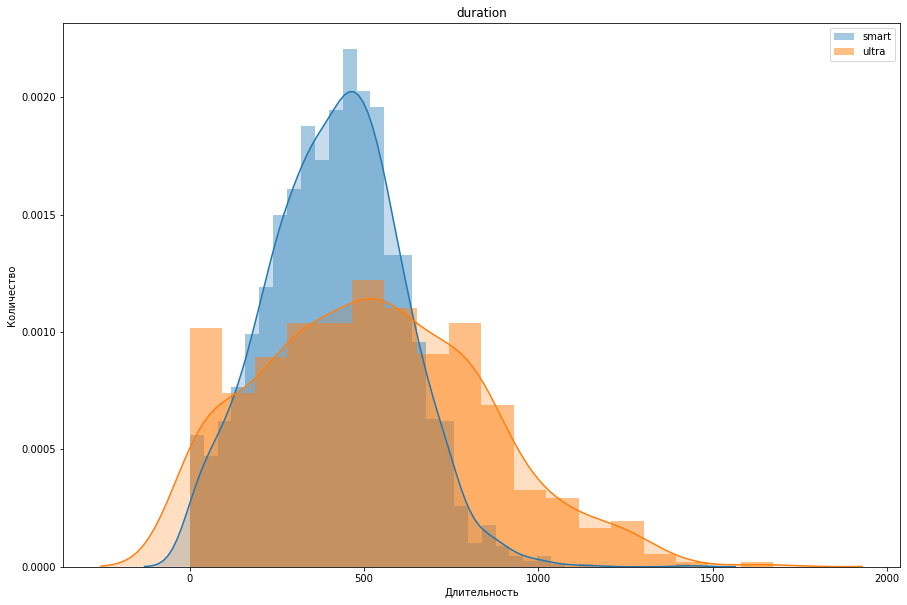

In [25]:
describe_action(smart, smart['duration']) #оценим основную информацию абонентов тарифа смарт
describe_action(ultra, ultra['duration']) #и тарифа ультра
hist_action(general_data, 'duration')

Абоненты тарифа смарт в значительной степени превышают лимит звонков, входящий в АП. Абоненты тарифа ультра - 
наоборот, не используют лимит полностью. Основная часть абонентов общается от 200 до 700 минут в месяц. 
Стандартное отклонение высокое в обоих случаях, что объясняется большим размахом данных. 

### Используемый трафик абонентами тарифов

count    2230.000
mean    16221.911
std      5886.300
min         0.000
25%     12645.250
50%     16529.000
75%     20068.000
max     38610.000
Name: mb_used, dtype: float64
Среднее: 16221.910762331838
Дисперсия: 34648523.30069166
Стандартное отклонение 5886.299627158955
count     986.000
mean    19467.138
std     10110.255
min         0.000
25%     11761.000
50%     19320.000
75%     26860.250
max     49789.000
Name: mb_used, dtype: float64
Среднее: 19467.137931034482
Дисперсия: 102217264.27537197
Стандартное отклонение 10110.255401095066


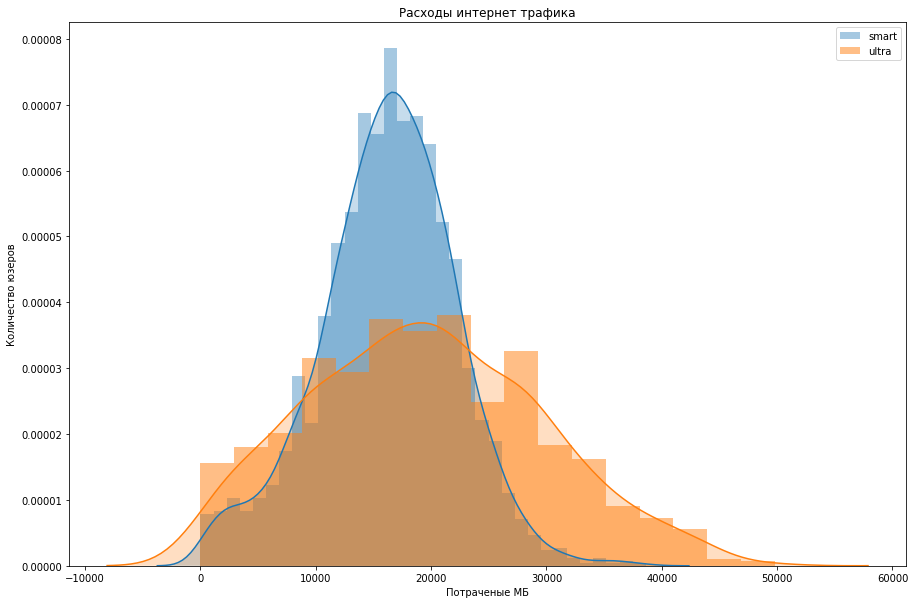

In [26]:
describe_action(smart, smart['mb_used'])
describe_action(ultra, ultra['mb_used'])
hist_action(general_data, 'mb_used')
plt.title('Расходы интернет трафика')
plt.xlabel("Потраченые МБ")
plt.ylabel('Количество юзеров');


Стандартное отклонение в данном случае еще выше. При этом, оба тарифа не перекрывают потреблности абонентов в трафике. 
Больше половны абонентов тарифа смарт дополнительно докупают трафик. Абоненты Ультра так же докупают трафик, но в меньшем объеме.
Jсновя часть пользователей использует от 10 до 30 ГБ Ежемесячо.

### Сколько отправлено СМС?

count   2230.000
mean      33.369
std       28.230
min        0.000
25%       10.000
50%       28.000
75%       51.000
max      143.000
Name: message_count, dtype: float64
Среднее: 33.36905829596412
Дисперсия: 796.9552557301129
Стандартное отклонение 28.230395954185852
count   986.000
mean     49.313
std      47.806
min       0.000
25%       6.000
50%      38.000
75%      78.750
max     224.000
Name: message_count, dtype: float64
Среднее: 49.31338742393509
Дисперсия: 2285.4174246558414
Стандартное отклонение 47.80603962530092


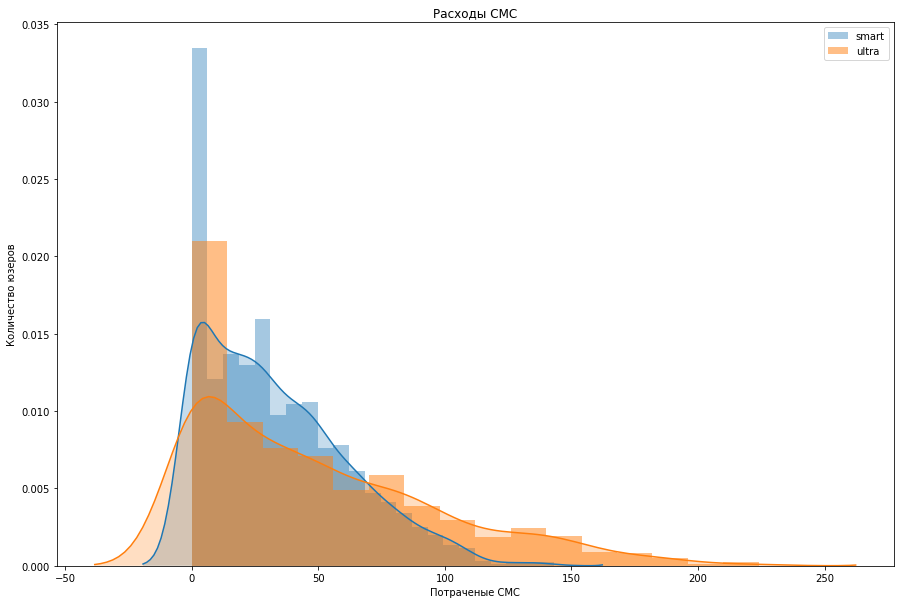

In [27]:
describe_action(smart, smart['message_count']) 
describe_action(ultra, ultra['message_count'])
hist_action(general_data, 'message_count')
plt.title('Расходы СМС')
plt.xlabel("Потраченые СМС")
plt.ylabel('Количество юзеров');


Стандартное отклонение такжвысоко, относительно среднего показателя. Основная часть пользователей тарифа смарт "укладывается" в лимит. Абоненты ультры не используют лимит в полном оъеме.

### Расходы абонентов

count   2230.000
mean    1294.305
std      820.900
min      550.000
25%      550.000
50%     1037.000
75%     1750.000
max     6770.000
Name: profit, dtype: float64
Среднее: 1294.3053811659192
Дисперсия: 673877.6236139194
Стандартное отклонение 820.9004955619891
count    986.000
mean    2070.943
std      378.630
min     1950.000
25%     1950.000
50%     1950.000
75%     1950.000
max     4800.000
Name: profit, dtype: float64
Среднее: 2070.943204868154
Дисперсия: 143360.42925834784
Стандартное отклонение 378.6296729765746


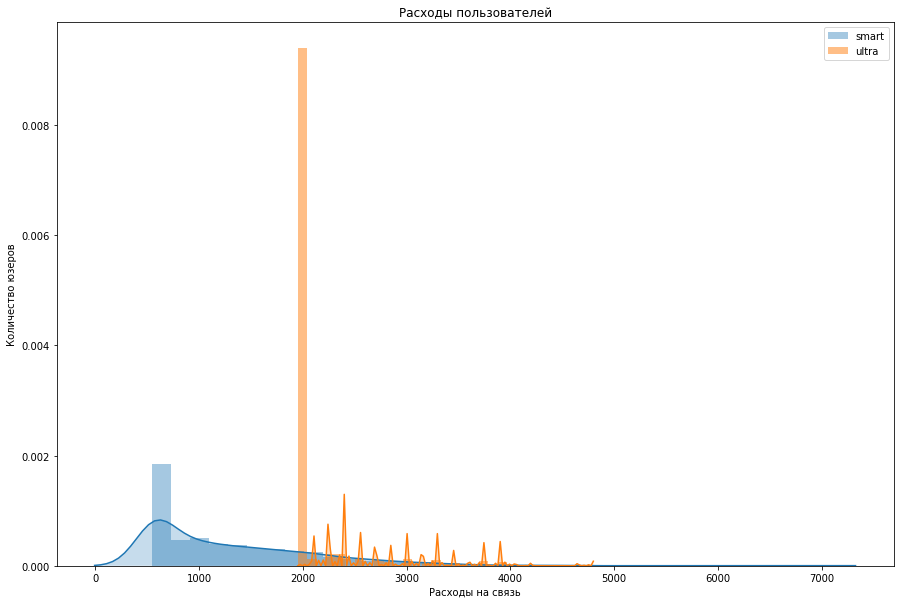

In [28]:
describe_action(smart, smart['profit']) #оценим основную информацию абонентов тарифа смарт
describe_action(ultra, ultra['profit'])
hist_action(general_data, 'profit')
plt.title('Расходы пользователей')
plt.xlabel("Расходы на связь")
plt.ylabel('Количество юзеров');
#Половина пользователей тарифа смарт переплачивают абонентскую плату, докупая дополнительные минуты, ГБ и сообщения. 
#Абсютное большинство абонентов тарифа ультра "укалдываются" в а/п, при этом имеют "избыток" минут и смс.

### Выводы по блоку "Анализ данных"

- Основная часть распределений нормальная. 
- Графики использования смс скошены. Причина может быть в том, что смс - не самый популярный способ связи. 
- Распределение дохода с абонентов, в  основной массе, находится в точке уровня абоненкой платы.

## Проверка гипотез

In [29]:
smart_profit = general_data.query('tariff == "smart"')['profit'] #выделяем таблицы по тарифу абонента с данными о месячной выручке
ultra_profit = general_data.query('tariff == "ultra"')['profit']

In [30]:
smart_profit

8       1350
9        550
10       550
11      1150
12      1550
        ... 
3210     950
3211    1550
3212    1150
3213     950
3215     550
Name: profit, Length: 2230, dtype: int64

In [31]:
#Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
#Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

alpha = 0.05 #критический уровень статистической значимости
#Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, 
#примениv метод scipy.stats.ttest_ind 
results = st.ttest_ind(smart_profit, ultra_profit, equal_var = False) #дисперсии выборок не равные
print('p-значение:', results.pvalue)

if (results.pvalue / 2 < 0.05):  #так как гипотеза двусторонняя - делим pvalue "в обе стороны"
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


In [32]:
moskow_profit = general_data.query('city == "Москва"')['profit'] #выделяем таблицы по городу абонента с 
#данными о месячной выручке
region_profit = general_data.query('city != "Москва"')['profit']

In [33]:
#Нулевая гипотеза - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
#Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из
#других регионов

alpha = 0.05

results = st.ttest_ind(moskow_profit, region_profit, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue / 2 < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


### Выводы по блоку "Проверка гипотез"

Гипотезу о равенстве средней вручки тарифов можно отвергнуть. Тем не менее, слишком большая вероятность того, что такое различие можно получить случайно.
Гипотезу о равенстве средней выручке в Москве и регионах не получилось отвергнуть. Тем не менее, так же, существует почти 50% вероятности, что данные могут быть случайными.

## Общие выводы

- Относительно цели заказчика, можно сделать вывод о том, что тариф УЛЬТРА, более прибыльный для компании. Не смотря на то, что абонентов с данным тарифом в 2 раза меньше, чем пользователей тарифа СМАРТ.
- Цель иседования - проанализировать поведение клиентов и сделать вывод — какой тариф лучше. По итогам анализа поведения клиентов, сравнения использния объема продуктов двух тарифов, проверив гипот, можно сделать вывод о том, что оба тарифа не явлются абсолютно универсальными. Тариф СМАРТ - не прывает потребительского спроса на объем продуктов по звонкам и интернету. Половина пользователей доплачивает дополнительно для увеличения пакета услуг. Риски - абоненты данного тарифа могут найти более универсальный вариант, абонентская плата, за который будет покрывать потности. Тариф УЛЬТРА - имеет лимиты по звонкам и СМС, которые не используются ни одним абонентом. В то же время, данные абонентык же не укладываются в отведенные лимиты по интернету. Риски - имея ряд услуг с "избытком", за который происходит "переплата", значимая часть абонентов так же может перейти на другой, более подходящий тариф. 
Рекомендация - пересмотреть условия обоих тарифов и направить рекламный бюджет на продвижение нового, более универсального.
Рекомендуемые условия для нового тарифа:
1. Лимит звонков: 700
2. Лимит интернет-трафика: 30-35 ГБ
3. Лимит СМС: Безлимит. (Большая экономия в ряду абонентов, кто использует очень мало либо не использует СМС)
4. Абонентская плата: 1000 - 1200 руб.
